# Topics that I would like to cover in this project

- 1) Basic EDA
- 2) Basic Visualisation
- 3) Basic Data Preprocessing
- 4) OneHOtEncoding
- 5) linear Regression Model Building
- 6) Understanding Metrics
- 7) Cross Validation

In [81]:
# Importing required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression

In [82]:
data = pd.read_csv('..\data\AirBnB-Price-Prediction.csv')

In [83]:
data.shape

(74111, 29)

In [84]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [85]:

data[['amenities','description','name'][0:10]]

,amenities,description,name
0,"{""Wireless Internet"",""Air conditioning"",Kitche...","Beautiful, sunlit brownstone 1-bedroom in the ...",Beautiful brownstone 1-bedroom
1,"{""Wireless Internet"",""Air conditioning"",Kitche...",Enjoy travelling during your stay in Manhattan...,Superb 3BR Apt Located Near Times Square
2,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",The Oasis comes complete with a full backyard ...,The Garden Oasis
3,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",This light-filled home-away-from-home is super...,Beautiful Flat in the Heart of SF!
4,"{TV,Internet,""Wireless Internet"",""Air conditio...","Cool, cozy, and comfortable studio located in ...",Great studio in midtown DC
...,...,...,...
74106,{},one room in bushwick apt,one room bushwick
74107,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...","Located on the Pacific Coast Highway, this apa...",Spacious Hermosa 2 BR on PCH
74108,"{TV,Internet,""Wireless Internet"",""Air conditio...",A modern apartment located in East Williamsbur...,Modern 2 Bedroom Apartment in Williamsburg
74109,"{TV,""Wireless Internet"",""Air conditioning"",Kit...","Fully renovated, designer's studio located in ...",Designer's Apartment in HEART of NYC


In [86]:
#pd.set_option('display.width', 10)
#pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
data['amenities'].str.split(',')

0                                                                                                                                                                                                                                                                                        [{"Wireless Internet", "Air conditioning", Kitchen, Heating, "Family/kid friendly", Essentials, "Hair dryer", Iron, "translation missing: en.hosting_amenity_50"}]
1                                                                                                                                                                                                                [{"Wireless Internet", "Air conditioning", Kitchen, Heating, "Family/kid friendly", Washer, Dryer, "Smoke detector", "Fire extinguisher", Essentials, Shampoo, Hangers, "Hair dryer", Iron, "translation missing: en.hosting_amenity_50"}]
2                                                                                                               

In [87]:
#pd.set_option('display.width', 10)
#pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
for num in data['amenities'].str.split(',').head(10):
    print(len(num))

9
15
19
15
12
10
21
26
21
13


In [88]:
data['amenities'].str.split(',').apply(len)

0         9
1        15
2        19
3        15
4        12
         ..
74106     1
74107    16
74108    31
74109    15
74110    18
Name: amenities, Length: 74111, dtype: int64

In [89]:
# As average amenities is 17 we have to create atleast 17 more features to see if there is any relationship between 
# amenities and prices
# Also we have to check whethr basic amenties are provided by all owners or not

data['amenities'].str.split(',').apply(len).mean()

17.602407200010795

In [90]:
# But ofr now we will exclude this column.

In [91]:
pd.reset_option('max_colwidth', None)

data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [92]:
data.id.nunique()

74111

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

Other columns that I dont want to be the part of analysis are

['id', 'description', 'amenities', 'latitude', 'longitude', 'name']

In [94]:
data.drop(labels=['id', 'description', 'amenities', 'latitude', 'longitude', 'name'],axis = 1, inplace =True)

In [95]:
data.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,NaN,t,t,NaN,2015-04-19,f,NaN,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [96]:
pd.set_option('display.max_rows',999)
data.isnull().sum().to_frame()

,0
log_price,0
property_type,0
room_type,0
accommodates,0
bathrooms,200
bed_type,0
cancellation_policy,0
cleaning_fee,0
city,0
first_review,15864


In [97]:
# Segregating data into different types

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   accommodates            74111 non-null  int64  
 4   bathrooms               73911 non-null  float64
 5   bed_type                74111 non-null  object 
 6   cancellation_policy     74111 non-null  object 
 7   cleaning_fee            74111 non-null  bool   
 8   city                    74111 non-null  object 
 9   first_review            58247 non-null  object 
 10  host_has_profile_pic    73923 non-null  object 
 11  host_identity_verified  73923 non-null  object 
 12  host_response_rate      55812 non-null  object 
 13  host_since              73923 non-null  object 
 14  instant_bookable        74111 non-null

In [99]:
data.select_dtypes(include= 'number').columns.tolist()

['log_price',
 'accommodates',
 'bathrooms',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds']

In [100]:
num_cols = data.select_dtypes(include= 'number').columns.tolist()

In [101]:
data[num_cols].head()

,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,3,1.0,2,100.0,1.0,1.0
1,5.129899,7,1.0,6,93.0,3.0,3.0
2,4.976734,5,1.0,10,92.0,1.0,3.0
3,6.620073,4,1.0,0,NaN,2.0,2.0
4,4.744932,2,1.0,4,40.0,0.0,1.0


In [102]:
data.select_dtypes(include='O').columns.tolist()

['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'city',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'neighbourhood',
 'thumbnail_url',
 'zipcode']

In [103]:
obj_cols = data.select_dtypes(include='O').columns.tolist()

In [104]:
data_o = data[obj_cols]

In [105]:
data_n = data[num_cols]

In [106]:
data_n.head()

,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,3,1.0,2,100.0,1.0,1.0
1,5.129899,7,1.0,6,93.0,3.0,3.0
2,4.976734,5,1.0,10,92.0,1.0,3.0
3,6.620073,4,1.0,0,NaN,2.0,2.0
4,4.744932,2,1.0,4,40.0,0.0,1.0


In [107]:
#pd.reset_option('max_colwidth', None)
data_o['thumbnail_url'].isnull().sum()

8216

In [108]:
data_o.loc[0:,'thumbnail_url']= np.where(data_o['thumbnail_url'].isnull(),0,1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [110]:
data_o.head()

,property_type,room_type,bed_type,cancellation_policy,city,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,neighbourhood,thumbnail_url,zipcode
0,Apartment,Entire home/apt,Real Bed,strict,NYC,2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,Brooklyn Heights,1,11201
1,Apartment,Entire home/apt,Real Bed,strict,NYC,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,Hell's Kitchen,1,10019
2,Apartment,Entire home/apt,Real Bed,moderate,NYC,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,Harlem,1,10027
3,House,Entire home/apt,Real Bed,flexible,SF,NaN,t,t,NaN,2015-04-19,f,NaN,Lower Haight,1,94117.0
4,Apartment,Entire home/apt,Real Bed,moderate,DC,2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,Columbia Heights,0,20009


In [111]:
# Lets look at the cardinality of each of the columns of type object

for col in data_o.columns:
    print(col,'-',data_o[col].nunique())

property_type - 35
room_type - 3
bed_type - 5
cancellation_policy - 5
city - 6
first_review - 2554
host_has_profile_pic - 2
host_identity_verified - 2
host_response_rate - 80
host_since - 3087
instant_bookable - 2
last_review - 1371
neighbourhood - 619
thumbnail_url - 2
zipcode - 769


In [80]:
data_o['thumbnail_url'].value_counts()

1    74111
Name: thumbnail_url, dtype: int64

In [114]:
# LEts work on a subset of a data 

df = data[['room_type', 'accommodates', 'bathrooms', 
  'cancellation_policy', 'cleaning_fee', 'instant_bookable', 
  'review_scores_rating', 'bedrooms', 'beds',
  'log_price']]


In [115]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74111 non-null  object 
 1   accommodates          74111 non-null  int64  
 2   bathrooms             73911 non-null  float64
 3   cancellation_policy   74111 non-null  object 
 4   cleaning_fee          74111 non-null  bool   
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74020 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: bool(1), float64(5), int64(1), object(3)
memory usage: 5.2+ MB


In [117]:
df.dtypes.value_counts()

float64    5
object     3
int64      1
bool       1
dtype: int64

In [129]:
for col in df.select_dtypes(include = ['O','bool']).columns:
    print(col,'-',df[col].nunique())
    
    #print(df[col].unique())
    #plt.figure(figsize= (5,5))
    print(df[col].value_counts())
    print()
    print()

room_type - 3
Entire home/apt    41310
Private room       30638
Shared room         2163
Name: room_type, dtype: int64


cancellation_policy - 5
strict             32374
flexible           22545
moderate           19063
super_strict_30      112
super_strict_60       17
Name: cancellation_policy, dtype: int64


cleaning_fee - 2
True     54403
False    19708
Name: cleaning_fee, dtype: int64


instant_bookable - 2
f    54660
t    19451
Name: instant_bookable, dtype: int64




accommodates - 16


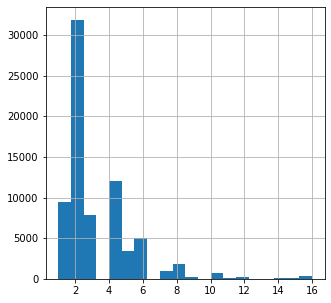



bathrooms - 17


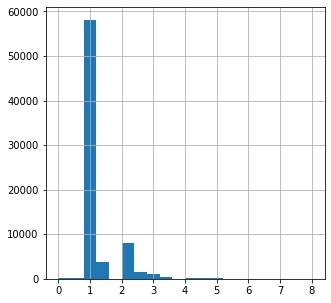



review_scores_rating - 54


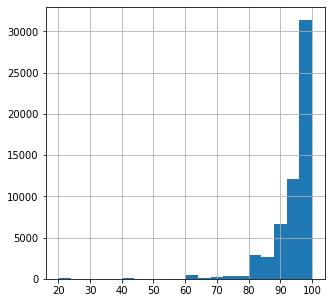



bedrooms - 11


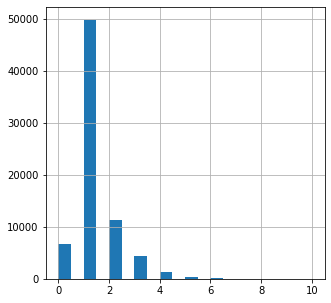



beds - 18


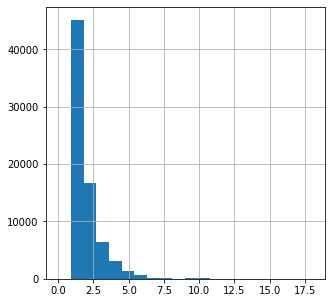



log_price - 767


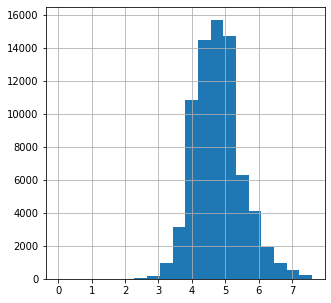

In [133]:
for col in df.select_dtypes(include = 'number').columns:
    print(col,'-',df[col].nunique())
    
    #print(df[col].unique())
    plt.figure(figsize= (5,5))
    df[col].hist(bins=20)
    plt.show()
    #print(df[col].value_counts())
    print()
    print()

In [139]:
for col in df.drop(labels=['log_price'],axis = 1).select_dtypes(include = 'number').columns:
    print(col,'-',df[col].nunique())
    
    print(df[col].unique())
    #plt.figure(figsize= (5,5))
    #df[col].hist(bins=20)
    #plt.show()
    print(df[col].value_counts().sort_values())
    print()
    print()

accommodates - 16
[ 3  7  5  4  2  6  8  1  9 10 16 11 12 14 13 15]
13       36
15       54
11       79
14      104
12      264
9       270
16      301
10      701
7       946
8      1795
5      3444
6      4969
3      7794
1      9434
4     12066
2     31854
Name: accommodates, dtype: int64


bathrooms - 17
[1.  1.5 2.  nan 2.5 3.  0.5 4.5 5.  0.  4.  3.5 5.5 7.5 6.  8.  7.  6.5]
7.5        6
7.0       10
6.5       12
6.0       24
5.5       39
8.0       41
5.0       72
4.5      116
0.0      198
0.5      209
4.0      286
3.5      429
3.0     1066
2.5     1567
1.5     3801
2.0     7936
1.0    58099
Name: bathrooms, dtype: int64


review_scores_rating - 54
[100.  93.  92.  nan  40.  97.  99.  90.  89.  91.  88.  86.  72.  98.
  95.  96.  84.  80.  94.  87.  85.  70.  60.  75.  20.  76.  83.  82.
  78.  73.  55.  81.  67.  71.  77.  79.  47.  74.  68.  66.  63.  50.
  53.  65.  64.  27.  69.  30.  58.  35.  62.  49.  57.  54.  56.]
56.0         1
35.0         1
54.0         1
58.0        